<h1>Tarea integradora - Resoluiones</h1>

<h3>Análisis y visualización de datos</h3>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>

En esta notebook presentamos las soluciones de los ejercicios de la tarea integradora en las que hubo más dificultades.

In [2]:
%matplotlib inline
import pandas
import numpy
import seaborn

In [3]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

## Parte 1 - Ejercicio 3

Otro posible gráfico es una secuencia de boxplots. Este gráfico muestra la distribución de los eventos por año, pero no muestra la cantidad de datos en cada box. Aunque esto oscurece información, puede ser útil si queremos ver la distribución sin que Buenos Aires absorva toda la masa de casos.

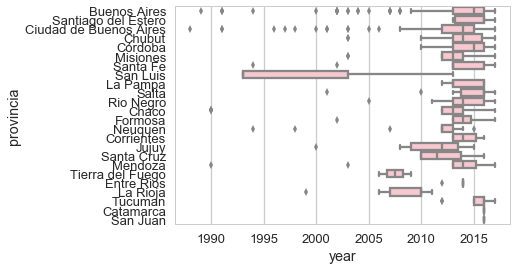

In [7]:
seaborn.boxplot(x="year", y="provincia", data=dataset, color='pink')

## Parte 1 - Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

Lo primero a definir es qué consideramos como un caso con violencia, tanto psíquica como física. Veamos los posibles valores que pueden tomar estas variables:

In [8]:
dataset.violencia_fisica.value_counts(dropna=False).to_frame()

,violencia_fisica
NaN,849
Golpes,230
Muerte,102
Heridas penetrantes,39
Otras formas de maltrato físico,32
"Golpes, Otras formas de maltrato físico",28
"Muerte, Heridas penetrantes",24
"Golpes, Heridas penetrantes",20
Quemaduras,8
Privación de la libertad / Secuestro,7


Vemos que hay numerosos valores, y que entre ellos también está el valor "Ninguno". Entonces, decidimos tomar como casos con violencia aquellos en los que el valor de la columna correspondiente sea distinto de nulo y distinto del string "Ninguno". Podemos obtener dichos valores con el siguiente código:

In [9]:
casos_vfisica = dataset.dropna(subset=['violencia_fisica'])
casos_vfisica = casos_vfisica[casos_vfisica.violencia_fisica != 'Ninguno']
casos_vfisica.shape

(585, 18)

Con dichos valores fintrados, tenemos que utilizar la definición de probabilidad conjunta:

$$P(N~~|~~M) = \frac{P (N \wedge	 M)}{P(M)}$$

Lo primero que podemos calcular es la probabilidad de un evento de violencia física

$$P(M)$$

In [10]:
prob_vfisica = len(casos_vfisica) / float(len(dataset))
## Recuerden que en python para division no entera deben convertir alguno de los atributos a float
print('P(M) = {}'.format(prob_vfisica))

P(M) = 0.4065323141070188


Lo segundo que tenemos que calcular entonces es la probabilidad conjunta 

$$P (N \wedge	 M)$$

para ello, contamos los casos en los que hubo ambos tipos de violencia. A los casos filtrados de violencia fisica le substraemos también las filas en las que NO hubo violencia psíquica siguiendo el mismo criterio (sin nan y sin valor "Ninguno") 

In [23]:
casos_vpsiquica_vfisica = casos_vfisica.dropna(subset=['violencia_psiquica'])
casos_vpsiquica_vfisica = casos_vpsiquica_vfisica[casos_vpsiquica_vfisica.violencia_psiquica != 'Ninguno']
casos_vpsiquica_vfisica.shape

(124, 17)

Para finalmente calcular la probabilidad, dividimos por el total de casos

In [45]:
prob_vpsiquica_vfisica = len(casos_vpsiquica_vfisica) / float(len(dataset))
print('P(M & N) = {}'.format(prob_vpsiquica_vfisica))

P(M & N) = 0.08617095205


Ahora la probabilidad condicional es calculada como:

In [26]:
prob_vpsiquica_dado_vfisica = prob_vpsiquica_vfisica / prob_vfisica
print('P(N | M) = {}'.format(prob_vpsiquica_dado_vfisica))

P(N | M) = 0.211965811966


### Otra forma:

Podemos aprovechar la definición de probabilidad conjunta para evitarnos un par de divisiones:

$$P(N~~|~~M) = \frac{P (N \wedge	 M)}{P(M)} = \frac{\frac{\text{# de casos con M y N}}{\text{# de casos}}}{\frac{\text{# de casos con M}}{\text{# de casos}}} = \frac{\text{# de casos con M y N}}{\text{# de casos con M}}$$

Vemos que los denominadores se cancelan, ya que para calcular ambas probabilidades estamos dividiendo por el número total de casos. Programado quedaría:

In [27]:
prob_vpsiquica_dado_vfisica = len(casos_vpsiquica_vfisica) / float(len(casos_vfisica))
print('P(N | M) = {}'.format(prob_vpsiquica_dado_vfisica))

P(N | M) = 0.211965811966


* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

Esto es una pregunta de interpretación, y muchas conclusiones se pueden extraer. Nuestra opinión es que la probabilidad de que exista violencia psícológica dado que existió la violencia física es muy baja y no refleja las situaciones reales, donde consideramos altamente probable que ambos tipos de violencia se presenten en conjunto. En este caso, el dataset no estaría registrando estos datos de manera fiable, por ejemplo a causa de la menor atención que se presta a los casos de abusos psicológicos. Al considerarlos de menor gravedad, menos denuncias son registradas.

* ¿Podemos concluir en que son eventos independientes dadas las muestras?

Para saber si los eventos son independientes podemos determinar si el producto de las probabilidades marginales es igual a la probabilidad conjunta, es decir, si la siguiente ecuación vale:

$$P(M) * P(N) = P(N \wedge	 M)$$

Para calcular esto, sólo nos queda calcular P(N)


In [28]:
casos_vpsiquica = dataset.dropna(subset=['violencia_psiquica'])
casos_vpsiquica = casos_vpsiquica[casos_vpsiquica.violencia_fisica != 'Ninguno']
casos_vpsiquica.shape

(486, 17)

In [30]:
prob_vpsiquica = len(casos_vpsiquica) / float(len(dataset))
prob_vpsiquica

0.33773453787352326

Finalmente, calculamos la igualdad

In [33]:
print('Producto de probabilidades marginales P(N)*P(M): {}'.format(prob_vfisica * prob_vpsiquica))
print('Probabilidad conjunta P(N & M): {}'.format(prob_vpsiquica_vfisica))

Producto de probabilidades marginales P(N)*P(M): 0.137300003236
Probabilidad conjunta P(N & M): 0.08617095205


Finalmente podemos decir que como estas cantidades no son iguales, entonces las variables no son independientes, tal y como es de esperar.

----

## Parte 2 - Ejercicio 1

In [34]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

Analíticamente, o buscando en internet, encontramos que la F.d.a de esta distribución exponencial es:

$$
Fda ( x ) = \begin{cases}
~~ 1 - e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

La podemos graficar con el siguiente código

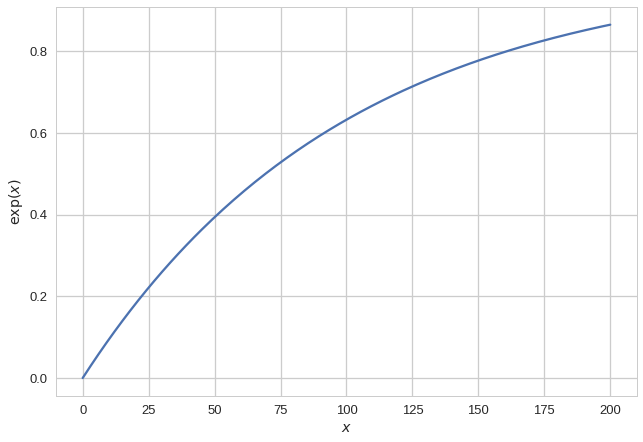

In [36]:
x = np.linspace(0, 200, 200)
y = 1 - np.exp(-0.01 * x)
plt.figure()
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

Sabemos que para calcular esta probabilidad tenemos que hallar:

$$Fda(150) - Fda(50)$$

Utilizando la fórmula anterior de la función de distribución acumulada lo podemos programar:

In [39]:
s1 = 1 - np.exp(-0.01*50)
s2 = 1 - np.exp(-0.01*150)
result = s2 - s1
result

0.38340049956420363

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

Sabemos que f(x) modela el tiempo antes de que la computadora se descomponga. Luego, lo que necesitamos es simplemente:

$$ Fda(100)$$

In [40]:
1 - np.exp(-0.01*100)

0.63212055882855767